In [4]:
import pickle

# Cargar la variable desde el archivo
with open('variable.pkl', 'rb') as f:
    algoPrediccion = pickle.load(f)

In [5]:
algoPrediccion.mean_absolute_errorDic

{'Regresion Lineal': 737.779013718947,
 'Regresion Polinomica': 412.10183615113436,
 'Regresion SVR con el Kernel : rbf': 348.7512835754309,
 'Regresion SVR con el Kernel : poly': 350.24816711556355,
 'Regresion SVR con el Kernel : linear': 658.6852907546541,
 'Regresion con Arboles de desicion': 363.36545235446795,
 'Regresion con Random forest': 278.8850031642791,
 'Regresion con KNN': 614.2302326659251}

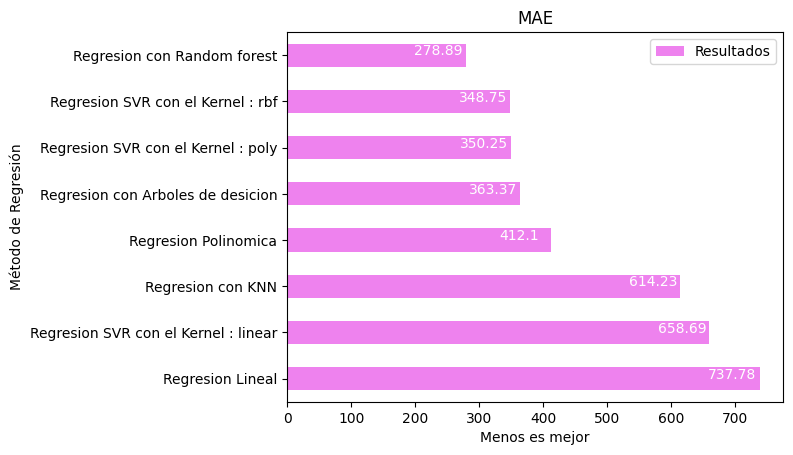

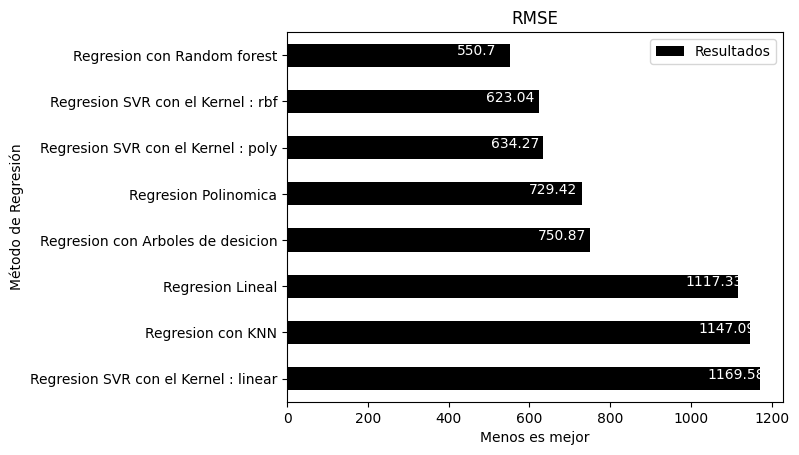

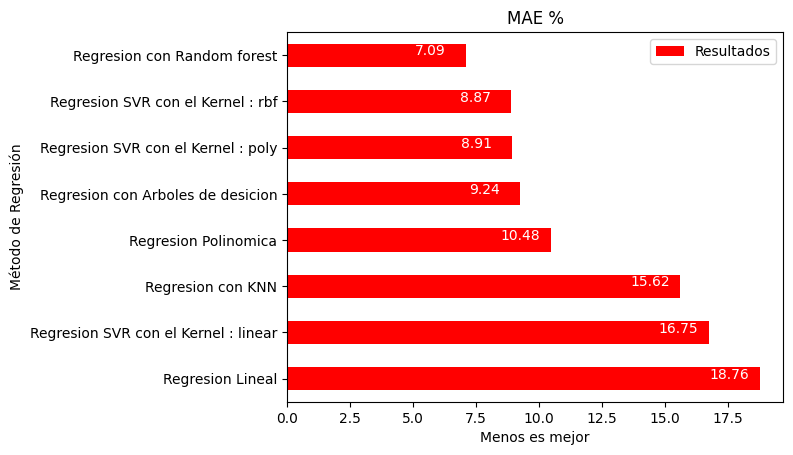

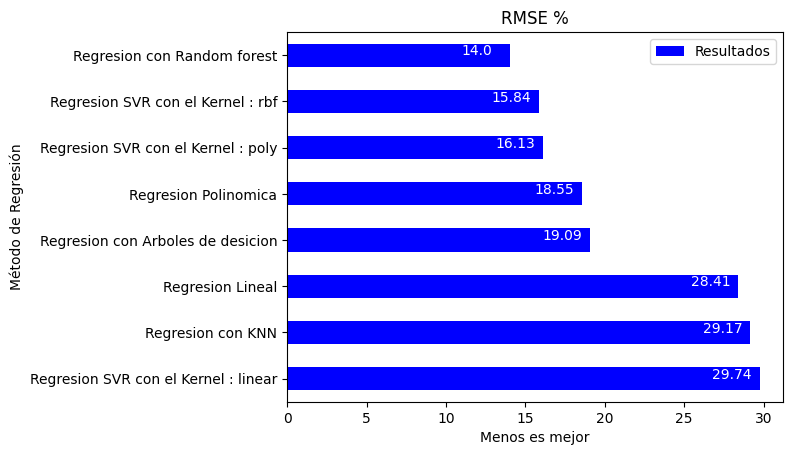

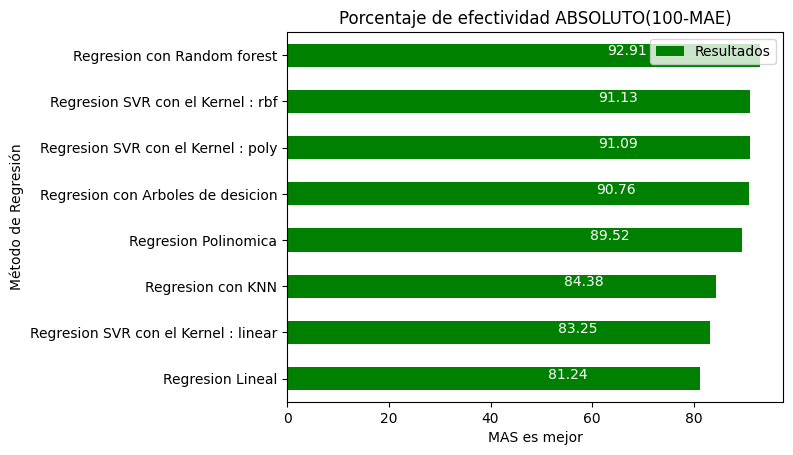

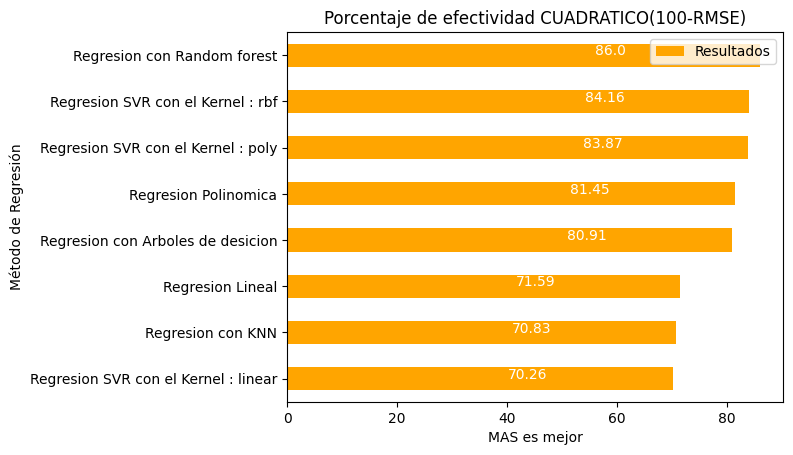

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import operator


dfMAE = pd.DataFrame.from_dict(algoPrediccion.mean_absolute_errorDic, orient='index', columns=['Resultados'])
dfRMSE = pd.DataFrame.from_dict(algoPrediccion.root_mean_squared_errorDic, orient='index', columns=['Resultados'])

dfMAEPorcentaje = pd.DataFrame.from_dict(algoPrediccion.meanAbsoluteErrorPorcentajeDic, orient='index', columns=['Resultados'])
dfRMSEPorcentaje = pd.DataFrame.from_dict(algoPrediccion.meanSquaredErrorPorcentajeDic, orient='index', columns=['Resultados'])

promedioAbsolutoEfectividadPorcentajeDic = pd.DataFrame.from_dict(algoPrediccion.promedioAbsolutoEfectividadPorcentajeDic, orient='index', columns=['Resultados'])
promedioCuadraticoEfectividadPorcentajeDic = pd.DataFrame.from_dict(algoPrediccion.promedioCuadraticoEfectividadPorcentajeDic, orient='index', columns=['Resultados'])


def comparacion(df,ascendente,descripcionAdicional,x,elColor,titulo):
   
    df = df.sort_values('Resultados', ascending=ascendente)
    df['Resultados']= df['Resultados'].round(2)
  
    pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x)) ##PARA EVITAR LA NOTACION CIENTIFICA
    # Crear el gráfico de barras horizontales
    ax = df.plot(kind='barh',color=elColor)

    
    

    # Añadir los valores de las barras al lado de cada barra
    for i, v in enumerate(df['Resultados']):
        ax.text(v -x , i, str(v), color='white')

    # Añadir título y etiquetas de los ejes
    plt.title(titulo)
    plt.xlabel(descripcionAdicional)
    plt.ylabel('Método de Regresión')

    # Mostrar el gráfico
    plt.show()

comparacion(dfMAE,False,"Menos es mejor",80,"violet","MAE")
comparacion(dfRMSE,False,"Menos es mejor",130,"black","RMSE")

comparacion(dfMAEPorcentaje,False,"Menos es mejor",2,"red","MAE %")
comparacion(dfRMSEPorcentaje,False,"Menos es mejor",3,"blue","RMSE %")


comparacion(promedioAbsolutoEfectividadPorcentajeDic,True,"MAS es mejor",30,"green","Porcentaje de efectividad ABSOLUTO(100-MAE)")
comparacion(promedioCuadraticoEfectividadPorcentajeDic,True,"MAS es mejor",30,"orange","Porcentaje de efectividad CUADRATICO(100-RMSE)")



In [68]:
def comparacion(df):
    df = df.sort_values('Resultados', ascending=False)

    # Crear el gráfico de barras horizontales
    ax = df.plot(kind='barh')

    # Añadir los valores de las barras al lado de cada barra
    for i, v in enumerate(df['Resultados']):
        ax.text(v + 0.81, i, str(v), color='black')

    # Añadir título y etiquetas de los ejes
    plt.title('Comparación de MAE entre algoritmos de regresión')
    plt.xlabel('Menos es mejor')
    plt.ylabel('Método de Regresión')

    # Mostrar el gráfico
    plt.show()